In [1]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model, load_model, plot_model, get_config, interpret_model

In [3]:
import pandas as pd
weather = pd.read_csv('../../Data/data_fix_prec.txt')

In [4]:
weather.head()

,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,...,wd500.deg.,hari,UTC,LAT,LON,ELEV,prec_obs,prec_nwp,prec_obs.group,prec_nwp.group
1,2021-02-27 15:00:00,96001,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.0,0.0,...,57.5841,0,12,5.87655,95.33785,126,0.0,0.0,no rain,no rain
2,2021-02-27 18:00:00,96001,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.0,0.0,...,59.9813,0,12,5.87655,95.33785,126,0.0,0.0,no rain,no rain
3,2021-02-27 21:00:00,96001,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.0,0.0,...,67.3222,0,12,5.87655,95.33785,126,0.0,0.0,no rain,no rain
4,2021-02-28 00:00:00,96001,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.0,0.0,...,65.4942,0,12,5.87655,95.33785,126,0.0,0.0,no rain,no rain
5,2021-02-28 03:00:00,96001,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.0,0.0,...,73.4932,0,12,5.87655,95.33785,126,0.0,0.0,no rain,no rain


In [5]:
weather.columns

Index(['Date', 'lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...',
       'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...',
       'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.',
       'lifcl.m.', 'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...',
       'ws950.m.s.', 'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.',
       'wd800.deg.', 't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.',
       'hari', 'UTC', 'LAT', 'LON', 'ELEV', 'prec_obs', 'prec_nwp',
       'prec_obs.group', 'prec_nwp.group'],
      dtype='object')

In [6]:
weather.dtypes

Date               object
lokasi              int64
suhu2m.degC.      float64
dew2m.degC.       float64
rh2m...           float64
wspeed.m.s.       float64
wdir.deg.         float64
lcloud...         float64
mcloud...         float64
hcloud...         float64
surpre.Pa.        float64
clmix.kg.kg.      float64
wamix.kg.kg.      float64
outlr.W.m2.       float64
pblh.m.           float64
lifcl.m.          float64
cape.j.kg.        float64
mdbz              float64
t950.degC.        float64
rh950...          float64
ws950.m.s.        float64
wd950.deg.        float64
t800.degC.        float64
rh800...          float64
ws800.m.s.        float64
wd800.deg.        float64
t500.degC.        float64
rh500...          float64
ws500.m.s.        float64
wd500.deg.        float64
hari                int64
UTC                 int64
LAT               float64
LON               float64
ELEV                int64
prec_obs          float64
prec_nwp          float64
prec_obs.group     object
prec_nwp.gro

In [7]:
weather.agg(['nunique']).T

,nunique
Date,3886
lokasi,169
suhu2m.degC.,122457
dew2m.degC.,90792
rh2m...,291028
wspeed.m.s.,369046
wdir.deg.,321439
lcloud...,354242
mcloud...,332626
hcloud...,331097


In [8]:
weather_dropped = weather.drop(columns=['hari', 'UTC', 'LAT', 'LON'])

In [9]:
setup??

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Union[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]], NoneType] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Union[Dict[str, list], NoneType] = None,
    numeric_features: Union[List[str], NoneType] = None,
    categorical_features: Union[List[str], NoneType] = None,
    date_features: Union[List[str], NoneType] = None,
    text_features: Union[List[str], NoneType] = None,
    ignore_features: Union[List[str], NoneType] = None,
    keep_featu

In [12]:
s = setup(weather_dropped, target='prec_obs', train_size=0.9, n_jobs=5, use_gpu=True, normalize = True, data_split_shuffle=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Description,Value
0,Session id,6460
1,Target,prec_obs
2,Target type,Regression
3,Original data shape,"(543972, 35)"
4,Transformed data shape,"(543972, 43)"
5,Transformed train set shape,"(489574, 43)"
6,Transformed test set shape,"(54398, 43)"
7,Numeric features,31
8,Categorical features,3
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [13]:
best_model = compare_models(sort='mae', cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.5042,3.3873,1.8405,0.8950,0.2598,1.1639,14.0900
lightgbm,Light Gradient Boosting Machine,0.5079,2.9323,1.7124,0.9091,0.2714,1.4813,4.2300
gbr,Gradient Boosting Regressor,0.5112,2.9789,1.7260,0.9077,0.2711,1.4769,523.5800
omp,Orthogonal Matching Pursuit,0.5131,2.8387,1.6849,0.9120,0.2729,1.5095,2.3800
catboost,CatBoost Regressor,0.5244,2.9011,1.7033,0.9101,0.2718,1.4665,10.6400
et,Extra Trees Regressor,0.5280,2.9664,1.7223,0.9081,0.2829,1.6205,76.8900
knn,K Neighbors Regressor,0.5349,3.1877,1.7854,0.9012,0.2921,1.5032,2.3400
xgboost,Extreme Gradient Boosting,0.5388,4.0784,2.0195,0.8736,0.2785,1.5007,4.4300
rf,Random Forest Regressor,0.5437,2.9890,1.7289,0.9074,0.2908,1.7262,753.6300
br,Bayesian Ridge,0.5509,2.8338,1.6834,0.9122,0.2776,1.4930,3.0200


In [14]:
train_data = get_config(variable='X_train')
test_data = get_config(variable='X_test')

In [15]:
train_data

,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp,prec_obs.group,prec_nwp.group
1,2021-02-27 15:00:00,96001,27.397301,21.605900,70.801399,3.433260,12.458000,0.553781,0.000000,0.000000,...,0.767220,281.622009,-5.20890,11.088900,6.22327,57.584099,126,0.000000,no rain,no rain
2,2021-02-27 18:00:00,96001,27.009001,21.516100,72.037598,3.049010,27.245001,0.640686,0.000000,0.000000,...,0.653591,250.968994,-5.05963,12.704400,5.96761,59.981300,126,0.000000,no rain,no rain
3,2021-02-27 21:00:00,96001,26.567200,21.422600,73.514900,2.045560,37.356899,0.717464,0.000000,0.000000,...,0.823568,227.029999,-4.89987,15.238100,7.04134,67.322197,126,0.000000,no rain,no rain
4,2021-02-28 00:00:00,96001,26.451900,21.540001,74.550697,2.225080,20.181601,0.698006,0.000000,0.000000,...,0.492229,120.120003,-4.72228,16.300699,7.54606,65.494202,126,0.000000,no rain,no rain
5,2021-02-28 03:00:00,96001,26.723000,21.369101,72.603798,2.342680,14.793400,0.626203,0.000000,0.000000,...,1.688550,137.419006,-4.64246,19.044201,8.93947,73.493202,126,0.000000,no rain,no rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489570,2023-03-25 00:00:00,97694,27.671700,23.152800,76.541298,1.463090,71.131699,0.561731,0.469545,0.405827,...,0.813209,203.268997,-4.76817,72.570801,4.02983,230.233994,20,0.000000,no rain,no rain
489571,2023-03-25 03:00:00,97694,28.209101,23.445400,75.498199,2.634610,74.872002,0.927896,0.808425,0.000000,...,1.853010,228.501007,-3.89113,61.203899,3.58785,247.509995,20,0.440837,no rain,light rain
489572,2023-03-25 06:00:00,97694,27.806999,23.658100,78.287697,1.827330,62.345100,1.000000,0.905965,0.403970,...,1.713400,188.535004,-4.06686,80.922699,5.12956,243.531998,20,0.566393,no rain,light rain
489573,2023-03-25 09:00:00,97694,24.841999,23.841400,94.316399,0.642705,15.609700,0.676878,1.000000,0.207761,...,2.936650,181.542999,-3.46006,70.818703,4.94492,253.940002,20,1.825503,no rain,light rain


In [16]:
test_data

,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp,prec_obs.group,prec_nwp.group
489575,2023-03-25 21:00:00,97694,22.992001,20.201900,84.447899,0.360673,100.430000,0.156663,0.462683,0.635015,...,1.21551,268.381989,-4.97732,82.302803,4.05421,223.190002,20,0.000000,light rain,no rain
489576,2023-03-26 00:00:00,97694,27.814899,22.990900,75.163803,1.605440,53.375801,0.267841,0.370927,0.650630,...,1.80455,206.576004,-5.11230,83.411697,2.35056,250.667007,20,0.000000,no rain,no rain
489577,2023-03-26 03:00:00,97694,28.187300,24.230400,79.246498,3.442290,132.598007,1.000000,1.000000,0.562891,...,5.54871,225.973999,-4.73753,81.731499,2.95080,262.709991,20,1.752359,no rain,light rain
489578,2023-03-26 06:00:00,97694,26.822300,24.945499,89.592598,0.903868,63.384201,0.985789,0.456599,0.629544,...,6.66324,245.119995,-4.64131,83.093300,3.48384,227.677994,20,6.029454,no rain,light rain
489579,2023-03-26 09:00:00,97694,24.966900,24.187099,95.578201,1.017560,35.616600,0.829466,0.704423,0.411236,...,5.26844,251.994003,-4.62929,73.901100,2.39899,192.960999,20,0.176095,light rain,no rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,2023-04-12 03:00:00,99992,29.764200,23.400101,68.803497,3.721340,261.503998,0.390150,0.488739,0.327736,...,6.48475,260.471008,-4.69787,73.075798,2.29511,231.966995,41,0.003601,no rain,no rain
543969,2023-04-12 06:00:00,99992,30.790100,24.114000,67.714302,5.811930,263.944000,0.536106,0.653845,0.377421,...,7.01409,248.417007,-4.63960,75.792198,2.05083,268.579010,41,3.669660,no rain,light rain
543970,2023-04-12 09:00:00,99992,28.844999,24.196400,76.117798,5.839920,268.894989,0.229447,0.570225,0.455976,...,8.06828,248.233002,-4.40575,77.148903,2.52709,272.921997,41,4.045040,no rain,light rain
543971,2023-04-12 12:00:00,99992,25.833401,23.970900,89.605003,0.500122,210.748993,0.087511,0.292942,0.447494,...,7.67518,256.295990,-4.33471,76.317001,3.07955,259.250000,41,0.000000,no rain,no rain


In [17]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.5042,3.3873,1.8405,0.8950,0.2598,1.1639


,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp,prec_obs.group,prec_nwp.group,prec_obs,prediction_label
489575,2023-03-25 21:00:00,97694,22.992001,20.201900,84.447899,0.360673,100.430000,0.156663,0.462683,0.635015,...,-4.97732,82.302803,4.05421,223.190002,20,0.000000,light rain,no rain,8.3,2.293516
489576,2023-03-26 00:00:00,97694,27.814899,22.990900,75.163803,1.605440,53.375801,0.267841,0.370927,0.650630,...,-5.11230,83.411697,2.35056,250.667007,20,0.000000,no rain,no rain,0.2,-0.008263
489577,2023-03-26 03:00:00,97694,28.187300,24.230400,79.246498,3.442290,132.598007,1.000000,1.000000,0.562891,...,-4.73753,81.731499,2.95080,262.709991,20,1.752359,no rain,light rain,0.0,-0.005435
489578,2023-03-26 06:00:00,97694,26.822300,24.945499,89.592598,0.903868,63.384201,0.985789,0.456599,0.629544,...,-4.64131,83.093300,3.48384,227.677994,20,6.029454,no rain,light rain,0.0,0.001756
489579,2023-03-26 09:00:00,97694,24.966900,24.187099,95.578201,1.017560,35.616600,0.829466,0.704423,0.411236,...,-4.62929,73.901100,2.39899,192.960999,20,0.176095,light rain,no rain,1.0,2.338618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,2023-04-12 03:00:00,99992,29.764200,23.400101,68.803497,3.721340,261.503998,0.390150,0.488739,0.327736,...,-4.69787,73.075798,2.29511,231.966995,41,0.003601,no rain,no rain,0.0,0.016041
543969,2023-04-12 06:00:00,99992,30.790100,24.114000,67.714302,5.811930,263.944000,0.536106,0.653845,0.377421,...,-4.63960,75.792198,2.05083,268.579010,41,3.669660,no rain,light rain,0.0,0.016726
543970,2023-04-12 09:00:00,99992,28.844999,24.196400,76.117798,5.839920,268.894989,0.229447,0.570225,0.455976,...,-4.40575,77.148903,2.52709,272.921997,41,4.045040,no rain,light rain,0.0,0.008013
543971,2023-04-12 12:00:00,99992,25.833401,23.970900,89.605003,0.500122,210.748993,0.087511,0.292942,0.447494,...,-4.33471,76.317001,3.07955,259.250000,41,0.000000,no rain,no rain,0.0,0.014930


In [18]:
plot_model(best_model, plot='parameter')

,Parameters
alpha,0.0001
epsilon,1.35
fit_intercept,True
max_iter,100
tol,1e-05
warm_start,False


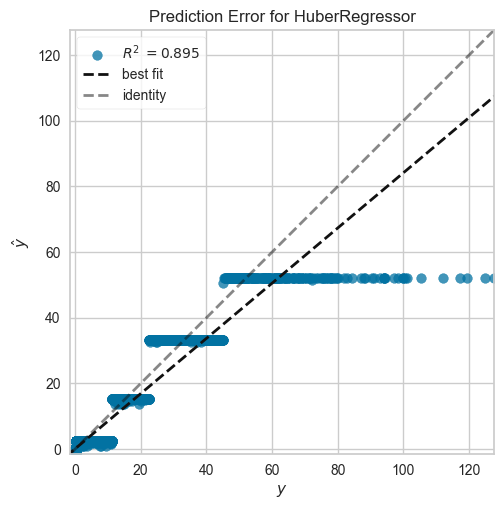

In [19]:
plot_model(best_model, plot='error')

In [21]:
from pycaret.regression import tune_model
best_model_tuned = tune_model(best_model, optimize='mae', early_stopping=True, return_tuner=True, tuner_verbose=True, return_train_score=True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


AttributeError: 'tuple' object has no attribute 'predict'